# *Tetrahedra mesh pipeline - trabecular bone scaffold*
From micro-CT image to tetrahedra mesh generation for COMSOL

Created on:  25.03.2025 <br />
Last update: 25.03.2025 <br />

- By: [Gianluca Iori](https://github.com/gianthk)
- Code license: MIT
- Narrative license: CC-BY-NC-SA

---
# Computational workflow
## Configuration and imports

In [1]:
import sys
sys.path.append('./../../')

In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import SimpleITK as sitk
import scipy

# import mcubes
# from scipy import ndimage, misc
# from skimage.filters import threshold_otsu, gaussian
# from skimage import measure, morphology
import meshio

from ciclope.utils.recon_utils import read_tiff_stack, plot_midplanes
import ciclope.utils.preprocess
from ciclope.utils.preprocess import remove_unconnected
from ciclope.core import tetraFE
import ciclope

## Data location

In [3]:
data_folder = '/Volumes/stamplab_terminus/processed/Zeiss730/2025/02/01_Scaffold-nocell_2025-02-07_111220/masks/'
datasets = ['scaffold1_clean', 'scaffold2_clean', 'scaffold3_clean']
output_folder = '/Volumes/stamplab_terminus/processed/Zeiss730/2025/02/01_Scaffold-nocell_2025-02-07_111220/meshes/' 

#### Load input data
Scan Settings:

* Zeiss Versa 730
* Flat panel detector
* 01_scaffold_nocell_batch (3 scans)
* 9.4 um pixelsize

Read the input data and define an array of the voxelsize

In [5]:
input_file = os.path.join(data_folder, datasets[0], 'slice_001.tiff')
data_3D = read_tiff_stack(input_file)
vs = np.ones(3)*9.4e-3 # [mm]

Inspect the dataset

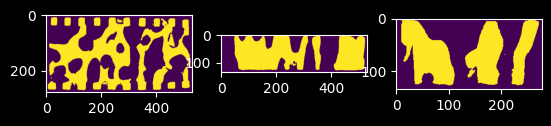

In [6]:
plot_midplanes(data_3D)
plt.show()

## Pre-processing
### Invert the image

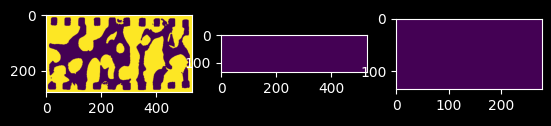

In [11]:
BW = np.invert(data_3D)
plot_midplanes(BW, 0, 0, -1)

### Crop along x and z
We can see that there is a void space around the scaffold

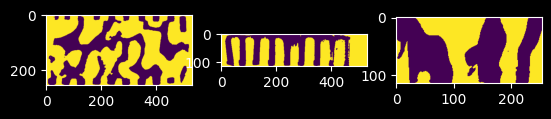

In [40]:
crop_size_z = 10
crop_size_y = 12
BW2 = BW[crop_size_z:-crop_size_z, crop_size_y:-crop_size_y, :]
plot_midplanes(BW2, -1, 0, 114)

### Remove unconnected regions

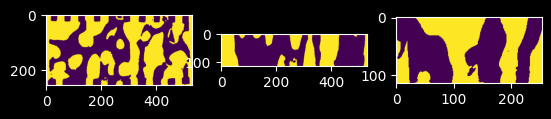

In [41]:
BW3 = remove_unconnected(BW2)
plot_midplanes(BW3)

### Pad from the input and output side

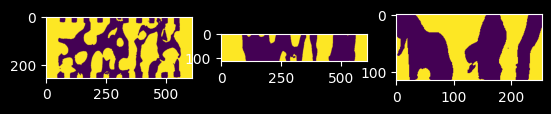

In [63]:
pad_width = 40

# Create a padding array with True values
padding_shape = (BW2.shape[0], BW2.shape[1], pad_width)
BW4 = np.ones(padding_shape, dtype=bool)

# Concatenate the original array with the padding array along the 3rd dimension
BW4 = np.concatenate((BW4, BW2.astype('bool'), BW4), axis=2, dtype=bool)
plot_midplanes(BW4)

### Create tetrahedra mesh
Volume meshing using [CGAL](https://www.cgal.org/) through [pygalmesh](https://github.com/nschloe/pygalmesh)

In [80]:
filename_mesh_out = './../../test_data/LHDL/3155_D_4_bc/results/3155_D_4_bc_tetramesh.vtk'

In [ ]:
m1 = ciclope.tetraFE.cgal_mesh(BW4, voxelsize=vs, meshtype='tetra', max_facet_distance=0.01, max_cell_circumradius=0.01)

Write the mesh of tetrahedra to disk

In [ ]:
filename_mesh_out = os.path.join(output_folder, datasets[0]+'voidmesh.bdf')
m1.write(filename_mesh_out)

---
# Dependencies

In [99]:
import watermark

In [ ]:
%load_ext watermark

%watermark
%watermark --iversions

---
# Acknowledgements
- This notebook was developed within [Building the Jupyter Community in MSK Imaging Research](https://github.com/JCMSK/2022_JCW), a Jupyter Community Workshop sponsored by [NUMFocus](https://numfocus.org/)